In [7]:
import learn_scrape as ls
ls.help()
driver=ls.start_driver()
ls.sleep(0.5)
ls.github_login(driver)
ls.instruct_menu_to_cohort_roster(driver,cohort='pt')
df_pt = ls.cohort_driver_to_csv(driver,'pt_cohort_data.csv',load=True)
df_pt
# driver.back()

[i] Workflow:
driver = start_driver()
login_data=load_login_data()
github_login(driver,login_data)
instruct_menu_to_cohort_roster(driver,cohort='pt')
df = cohort_driver_to_csv(driver,'pt_cohort_data.csv',load=True)
Loaded json data. Keys:
dict_keys(['username', 'password'])
[i] Successfully saved 'pt_cohort_data.csv'


In [15]:
df_pt['Completed Lessons'] = df_pt['Completed Lessons'].astype("int")

In [16]:
df_pt.columns

Index(['Completed Lessons', 'Last Checkin Note', 'Checkins (NoShows)',
       'Instructor'],
      dtype='object')

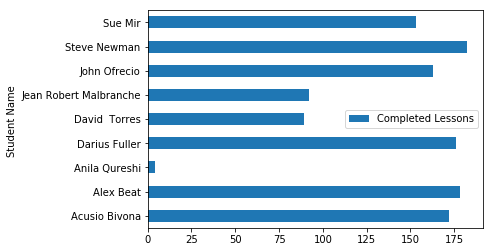

In [19]:
# df_pt.set_index('Student Name ',inplace=True)
df_pt.plot(kind='barh')#kind='bar',x='Completed Lessons')

In [22]:
driver.back()

In [24]:
driver=ls.start_driver()
ls.sleep(0.5)
ls.github_login(driver)
ls.instruct_menu_to_cohort_roster(driver,cohort='ft')
df_ft = ls.cohort_driver_to_csv(driver,'ft_cohort_data.csv',load=True)

Loaded json data. Keys:
dict_keys(['username', 'password'])


JavascriptException: Message: javascript error: Failed to execute 'elementsFromPoint' on 'Document': The provided double value is non-finite.
  (Session info: chrome=79.0.3945.79)


In [ ]:
ls.sleep(0.5)
ls.instruct_menu_to_cohort_roster(driver,cohort='ft')
df_ft = ls.cohort_driver_to_csv(driver,'ft_cohort_data.csv',load=True)

In [ ]:
# login_data=ls.load_login_data()
ls.github_login(driver)

In [ ]:
import requests
import time

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# import os,sys
# os.path.abspath(os.curdir)

In [ ]:
# def add_dir_to_path(path=None,rel_path=None,verbose=True):
#     """Adds the provided path (or current directory if None provided) to
#     sys.path.
    
#     Args:
#         path (str): folder to add to path (May need to be absolute).
#         rel_path (str): relative folder path to be converted to absolute and added.
#         verbose (bool): Controls display of success/failure messages. Default =True"""
#     import pathlib, os, sys
    
#     # If no path provided:
#     if path is None:
    
#         ## If no relative path provided, use current dir
#         if rel_path is not None:
#             if verbose:
#                 print(f"[i] Converting relative path '{rel_path}' to absolute.")
#             import os
#             os.chdir(rel_path)
#             add_path = os.path.abspath(os.curdir)
# #             print os.path.abspath(os.)
            
#         else:
#             add_path = os.path.abspath(os.curdir)
        

#     ## Set add_path = to provided path
#     else:
#         add_path=path
        
#     ## Check if folder already in path
#     if add_path in sys.path:
#         print(f'[i] Path already in sys.path:\n\t- "{add_path}"')
#         return

#     ## otherwise append path
#     else:
#         sys.path.append(add_path)
    
#     ## Check if 
#     if add_path in sys.path:
#         if verbose:
#             print(f'[Success] Successfully added to sys.path:\n\t -"{add_path}"')
#     else:
#         if verbose:        
#             print(f'[Error] Path was not added to path.')
#     return
        
# add_dir_to_path('/Users/jamesirving/')
# sys.path
# # import sys,os
# # add_path = os.path.abspath(os.curdir)
# # print(add_path)
# # add_path in sys.path

In [ ]:
def start_driver(url = 'https://instruction.learn.co/staff/students'):
    from selenium import webdriver
    driver = webdriver.Chrome()
    driver.get(url)
    return driver

driver = start_driver()

In [ ]:
# driver = webdriver.Chrome()

In [ ]:
# url = 'https://instruction.learn.co/staff/students'

In [ ]:
# driver.get(url)

## Username for Github

In [ ]:
# import os
# login_data_file = "/Users/jamesirving/.secret/learn_login.json"

# just_folder = '/'.join(login_data_file.split('/')[:-1])
# os.chdir(just_folder)
# print(os.path.abspath(os.getcwd()))
# %ls

In [ ]:
def load_login_data(login_data_file = "/Users/jamesirving/.secret/learn_login.json",
                   verbose=True):
    """Loads in json file from path"""
    with open(login_data_file,'r+') as f:
        import json
        fdata= f.read()
        login_data =  json.loads(fdata)
        
        if verbose:
            print("Loaded json data. Keys:")
            print(login_data.keys())
        return login_data
login_data=load_login_data()

In [ ]:
# username = driver.find_element_by_xpath('//*[@id="login_field"]')
# username.send_keys(login_data['username'])

## Password for Github

In [ ]:
def github_login(driver,login_data):
    """Logs into GitHub Account (for instruction.learn)
    url = 'https://instruction.learn.co/staff/students'
    """
    username = driver.find_element_by_xpath('//*[@id="login_field"]')
    username.send_keys(login_data['username'])

    password = driver.find_element_by_xpath('//*[@id="password"]')
    password.send_keys(login_data['password'])

    sign_in = driver.find_element_by_xpath('//*[@id="login"]/form/div[2]/input[8]')
    sign_in.click()
github_login(driver,login_data)

In [ ]:
# sign_in = driver.find_element_by_xpath('//*[@id="login"]/form/div[2]/input[8]')
# sign_in.click()
cohort_lead =d river.find_element_by_xpath('/html/body/div[1]/nav/div[1]/ul/li[1]/a')
my_cohorts = driver.find_element_by_xpath('//*[@id="js-parentDropdownLink"]')#'/html/body/div[1]/nav/div[1]/ul/li[1]/div')
# my_cohorts=driver.find_element_by_class_name("uk-navbar-dropdown uk-navbar-dropdown-bottom-left")

actions = ActionChains(driver)
actions.move_to_element(cohort_lead)
actions.pause(.5)
actions.click(my_cohorts)
actions.perform()

# New code: branch point - Cohort Rosters
- Would like to go to Cohort > Student Rosters later.


In [ ]:
def instruct_menu_to_cohort_roster(driver,cohort="pt"):
    import time
    time.sleep(0.5)
    
    cohort_lead =driver.find_element_by_xpath('/html/body/div[1]/nav/div[1]/ul/li[1]/a')
    my_cohorts = driver.find_element_by_xpath('//*[@id="js-parentDropdownLink"]')
    if cohort=="pt":
        cohort_link = driver.find_element_by_xpath('//*[@id="js-childrenList-141"]/ul/li[1]/a')

    elif cohort=="ft":
        cohort_link = driver.find_element_by_xpath('//*[@id="js-sidenavChildrenList-140"]/li[2]/a')
#         return ft_cohort

    actions = ActionChains(driver)
    actions.move_to_element(cohort_lead)
    actions.pause(.5)
    actions.click(my_cohorts)
    actions.pause(.5)

    actions.click(cohort_link)
    return actions.perform()

instruct_menu_to_cohort_roster(driver)

In [ ]:
# import time
# time.sleep(0.5)
# menu = driver.find_element_by_xpath('/html/body/div[1]/nav/div[3]/a')
# menu.click()

In [ ]:
my_cohorts = driver.find_element_by_xpath('//*[@id="js-parentSidenavLink"]')
my_cohorts.click()

In [ ]:
pt_cohort = driver.find_element_by_xpath('//*[@id="js-sidenavChildrenList-140"]/li[1]/a')
ft_cohort = driver.find_element_by_xpath('//*[@id="js-sidenavChildrenList-140"]/li[2]/a')

In [ ]:
pt_cohort.click()

In [ ]:
# with open("john_ofrecio.txt",'r') as f:
#     john = f.read()
# john

In [ ]:
def cohort_driver_to_csv(driver,output_file='cohort_output.csv',
                         debug=False,load=False,
                        load_kws=None):
    """Exports the table content inside of the driver.page_source to csv file.
    
    Args:
        driver (WebDriver): cohort instruct page's driver
        output_file (str): name of csv file to save.
    
    TO DO: Add link extraction"""
    my_html = driver.page_source
    soup = BeautifulSoup(my_html, 'html.parser')

    table = soup.find("table")
    rows = table.find_all('tr')

    output_rows = []
    for row in rows:
        row_text = row.get_text(separator='\t',strip=True)
        
        if "Links" in row_text:
            row_text=row_text.replace("\tLinks",' ')
        
        profile_links = [x['href'] for x in john_data.find_all('a')]
        if debug:
            print(len(row_text.split('t')))
            if 'John' in row_text:
                print("Returning John row object")
                return row
            
        repl_dict={
            ':':' ',
#             ')':' ',
            '\n':' '
        }
        for k,v in repl_dict.items():
            row_text = row_text.replace(k,v)
#         row_text = row_text.replace(':',' ').replace(')',' ').replace('\n',' ')

        output_rows.append(row_text)#row.get_text(separator='\t',strip=True))

    with open(output_file, 'w+') as csvfile:
        csvfile.write('\n'.join(output_rows))
        
    print(f"[i] Successfully saved '{output_file}'")
    
    if load:
#         header = pd.read_csv(output_file,delimiter='\t',nrows=1)
        if load_kws is not None:
            df = pd.read_csv(output_file,delimiter='\t',**load_kws)
        else:
            df = pd.read_csv(output_file,delimiter='\t')
         
        ## Save column names to restore
#         cols = df.columns
        df.reset_index(inplace=True)
        cols = df.drop('index',axis=1).columns
        
        if df["Completed Lessons"].isna().any():
            shift_index = df.loc[(df['Completed Lessons'].isna())].index#.copy()
            
#             ## Preview bad row alignment
#             display(df.loc[shift_index])
            
            ## Replace the column data to match others
            cols_to_swap = {"Completed Lessons":"Last Checkin Note",
                           "Instructor":"Checkins (NoShows)",
                           "Checkins (NoShows)":"Last Checkin Note"}
            
            for bad_col,good_col in cols_to_swap.items():
#             df.loc[shift_index,'Completed Lessons']=df.loc[shift_index,'Last Checkin Note'].copy()
                df.loc[shift_index,bad_col]=df.loc[shift_index,good_col].copy()
            df.loc[shift_index,"Last Checkin Note"]=np.nan
        
        
#             ##Preview changes
#             display(df.loc[shift_index])
        
        
        
        # Drop one of the redundant columns
        drop_col = "Completed Lessons"#'Last Checkin Note'
        df.drop(columns=[drop_col],inplace=True)

        # Restore names to columns
        df.columns = cols
        
        return df
    
df = cohort_driver_to_csv(driver,"pt_cohort_data.csv",load=True)
df

In [ ]:

# def cohort_driver_to_csv2(driver,output_file='cohort_output.csv',
#                          debug=False,load=False,
#                         load_kws=None):
#     """Exports the table content inside of the driver.page_source to csv file.
    
#     Args:
#         driver (WebDriver): cohort instruct page's driver
#         output_file (str): name of csv file to save.
    
#     TO DO: Add link extraction"""
#     my_html = driver.page_source
#     soup = BeautifulSoup(my_html, 'html.parser')

#     table = soup.find("table")
#     rows = table.find_all('tr')

#     output_rows = []
#     for row in rows:
#         row_text = row.get_text(separator='\t',strip=True)
        
#         ## TO DO:
#         if "Links" in row_text:
#             row_text=row_text.replace("\tLinks",' ')
#             row_text+="\tLinks"
        
#         profile_links = [x['href'] for x in row.find_all('a')]#
        
#         ## send back bad rows for troubleshooting
#         if debug:
#             print(len(row_text.split('t')))
#             if 'John' in row_text:
#                 print("Returning John row object")
#                 return row
            
#         ## Replace Strings
#         repl_dict={
#             ':':' ',
# #             ')':' ',
#             '\n':' '
#         }
#         for k,v in repl_dict.items():
#             row_text = row_text.replace(k,v)

#         ## Append Links
#         row_text+=",".join(profile_links)
#         ## Append cleaned row
#         output_rows.append(row_text)#row.get_text(separator='\t',strip=True))

#     with open(output_file, 'w+') as csvfile:
#         csvfile.write('\n'.join(output_rows))
        
#     print(f"[i] Successfully saved '{output_file}'")
    
#     if load:
# #         header = pd.read_csv(output_file,delimiter='\t',nrows=1)
#         if load_kws is not None:
#             df = pd.read_csv(output_file,delimiter='\t',**load_kws)
#         else:
#             df = pd.read_csv(output_file,delimiter='\t')
         
#         ## Save column names to restore
# #         cols = df.columns
#         df.reset_index(inplace=True)
#         cols = df.drop('index',axis=1).columns

#         display(df)
#         if df["Completed Lessons"].isna().any():
        
#             shift_index = df.loc[(df['Completed Lessons'].isna())].index#.copy()
            
#             ## Preview bad row alignment
#             display(df.loc[shift_index])
            
#             ## Replace the column data to match others
#             cols_to_swap = {"Completed Lessons":"Last Checkin Note",
#                            "Instructor":"Checkins (NoShows)",
#                            "Checkins (NoShows)":"Last Checkin Note"}
            
#             for bad_col,good_col in cols_to_swap.items():
# #             df.loc[shift_index,'Completed Lessons']=df.loc[shift_index,'Last Checkin Note'].copy()
#                 df.loc[shift_index,bad_col]=df.loc[shift_index,good_col].copy()
#             df.loc[shift_index,"Last Checkin Note"]=np.nan
        
        
#             ##Preview changes
#             display(df.loc[shift_index])
        
        
        
#         # Drop one of the redundant columns
#         drop_col = "Completed Lessons"#'Last Checkin Note'
#         df.drop(columns=[drop_col],inplace=True)

#         # Restore names to columns
#         df.columns = cols
        
#         return df
    

# df = cohort_driver_to_csv2(driver,"pt_cohort_data.csv",load=True)
# df

In [ ]:
# df

In [ ]:
john_data = cohort_driver_to_csv(driver,"pt_cohort_data.csv",debug=True)#,load=True)
row_text = john_data.get_text(separator='\t',strip=True)
row_text = row_text.replace(':','')
len(row_text.split('t'))

In [ ]:
[x['href'] for x in john_data.find_all('a')]

In [ ]:
df = pd.read_csv("pt_cohort_data.csv",delimmeter='\t')

In [ ]:
df

### Progress Summary; 12/13/19
- Have gotten pretty far using:
    - https://kite.com/python/examples/4420/beautifulsoup-parse-an-html-table-and-write-to-a-csv
    - https://gist.github.com/AO8/63b9a5acb9fb238cbed13a0269d14137
    
- Current Issue is some rows get broken up into multiple.
- Related to the contenst of the Notes cell.
- Not sure what causes it to become confused and think its more than 1 line of data.

### Example Jeff Code to copy


In [ ]:
# program
soup.findAll('h3', class_ = 'uk-card-title uk-margin-remove-bottom')[1].text.strip()

In [ ]:
# ed coach check ins 
soup.findAll('div', class_ = 'uk-card-body')[1]

In [ ]:
soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')

In [ ]:
start_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Educational')

In [ ]:
stop_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Maximum')

In [ ]:
my_str = soup.findAll('div', class_ = 'uk-card-body')[1].text[start_ed_coach:stop_ed_coach]

In [ ]:
from pprint import pprint
# pprint(soup.prettify()[:1000])
# table = soup.find_all("table")
rows = soup.find_all("table",attrs={"class":"details"})
rows

In [ ]:
text = []
[text.append(tag.text) for tag in rows]
text
# cleaned_text = ','.join(text).replace('\n',',')
# df = pd.read_html(cleaned_text)

In [ ]:
tag=rows[0]
# tag.get_text()
tag.text

In [ ]:
tag= rows[0]
help(tag)

# Original Continue'd Workflow:

In [ ]:
# click view students to get to the students section
view = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div[1]/div/div[2]/a')
view.click()

In [ ]:
# cancelled students
canceled = driver.find_element_by_xpath('//*[@id="student-index-card"]/h2[2]')
canceled.click()

In [ ]:
# grab canceled students
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [1]:
canceled_url = []
canceled_name = []
for x in soup.find(id = 'js-students-cancelled').find_all('a'):
    
    ## ADD IF CHECK FOR COHORT LIST HERE.
    print(x['href'] + ' - ' + x.text)
    canceled_url.append(x['href'])
    canceled_name.append(x.text)

NameError: name 'soup' is not defined

In [ ]:
canc

In [ ]:
canceled_df = pd.DataFrame({'name': canceled_name,
                            'url': canceled_url})

In [ ]:
canceled_df.head()

In [ ]:
soup.find(id = 'js-students-graduated').find_all('a')

In [ ]:
graduated_url = []
graduated_name = []
for x in soup.find(id = 'js-students-graduated').find_all('a'):
    print(x['href'] + ' - ' + x.text)
    graduated_url.append(x['href'])
    graduated_name.append(x.text)

In [ ]:
graduated_df = pd.DataFrame({'name': graduated_name,
                            'url': graduated_url})

In [ ]:
graduated_df.head()

In [ ]:
canceled_df.head()

In [ ]:
canceled_df.loc[0, 'url']

In [ ]:
https://instruction.learn.co/staff/students/siguy12

In [ ]:
'https://instructor.learn.co' + canceled_df.loc[0, 'url']

In [ ]:
driver.get('https://instruction.learn.co/' + canceled_df.loc[0, 'url'])

In [ ]:
# grab program, pacing, past_cohorts, learn.co url

In [ ]:
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [ ]:
# program
soup.findAll('h3', class_ = 'uk-card-title uk-margin-remove-bottom')[1].text.strip()

In [ ]:
# ed coach check ins 
soup.findAll('div', class_ = 'uk-card-body')[1]

In [ ]:
soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')

In [ ]:
start_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Educational')

In [ ]:
stop_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Maximum')

In [ ]:
my_str = soup.findAll('div', class_ = 'uk-card-body')[1].text[start_ed_coach:stop_ed_coach]

In [ ]:
my_str

In [ ]:
[int(s) for s in my_str.split() if s.isdigit()]

In [ ]:
# cohort 
soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[0].text

In [ ]:
# pacing
soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[1].text

In [ ]:
# past cohorts 
soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[2].text

In [ ]:
# learn.co link
soup.find('div', class_ = 'custom-badges').findAll('a', class_ = 'custom-badge-icon')[1]['href']

In [ ]:
driver.get('http://learn.co/siguy12')

In [ ]:
def get_info(url_part2):
    driver.get('https://instruction.learn.co' + url_part2)
    time.sleep(2)
    my_html = driver.page_source
    soup = BeautifulSoup(my_html, 'html.parser')
    program = soup.findAll('h3', class_ = 'uk-card-title uk-margin-remove-bottom')[1].text.strip()
    start_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Educational')
    stop_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Maximum')
    my_str = soup.findAll('div', class_ = 'uk-card-body')[1].text[start_ed_coach:stop_ed_coach]
    ed_coach_taken = [int(s) for s in my_str.split() if s.isdigit()][0]
    try:
        ed_coach_avail = [int(s) for s in my_str.split() if s.isdigit()][1]
    except IndexError:
        ed_coach_avail = ''
    cohort = soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[0].text
    pacing = soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[1].text
    try:
        past_cohorts = soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[2].text
    except IndexError:
        past_cohorts = ''
    learn_link = soup.find('div', class_ = 'custom-badges').findAll('a', class_ = 'custom-badge-icon')[1]['href']
    return program, ed_coach_taken, ed_coach_avail, cohort, pacing, past_cohorts, learn_link

In [ ]:
get_info('/staff/students/siguy12')

In [ ]:
get_info('/staff/students/perafolio')

In [ ]:
canceled_df.head(2)

In [ ]:
prog_list = []
ed_coach_used_list = []
ed_coach_avail_list = []
cohort_list = []
pacing_list = []
past_cohorts_list = []
learn_list = []
for index, x in enumerate(canceled_df['url']):
    prog_elem, ed_elem1, ed_elem2, cohort_elem, pacing_elem, past_elem, learn_elem = get_info(x)
    prog_list.append(prog_elem)
    ed_coach_avail_list.append(ed_elem1)
    ed_coach_used_list.append(ed_elem1)
    cohort_list.append(cohort_elem)
    pacing_list.append(pacing_elem)
    past_cohorts_list.append(past_elem)
    learn_list.append(learn_elem)
    if index % 50 == 0:
        print(f'Completed {index} out of {len(canceled_df["url"])}')

In [ ]:
canceled_df['program'] = prog_list
canceled_df['cohort'] = cohort_list
canceled_df['pacing'] = pacing_list
canceled_df['past_cohorts'] = past_cohorts_list
canceled_df['ed_coach_used'] = ed_coach_used_list
canceled_df['ed_coach_available'] = ed_coach_avail_list
canceled_df['learn_url'] = learn_list

In [ ]:
canceled_df.to_csv('canceled_df.csv', index = False)

In [ ]:
prog_list = []
ed_coach_used_list = []
ed_coach_avail_list = []
cohort_list = []
pacing_list = []
past_cohorts_list = []
learn_list = []
for index, x in enumerate(graduated_df['url']):
    prog_elem, ed_elem1, ed_elem2, cohort_elem, pacing_elem, past_elem, learn_elem = get_info(x)
    prog_list.append(prog_elem)
    ed_coach_avail_list.append(ed_elem1)
    ed_coach_used_list.append(ed_elem1)
    cohort_list.append(cohort_elem)
    pacing_list.append(pacing_elem)
    past_cohorts_list.append(past_elem)
    learn_list.append(learn_elem)
    if index % 50 == 0:
        print(f'Completed {index} out of {len(graduated_df["url"])}')

In [ ]:
graduated_df['program'] = prog_list
graduated_df['cohort'] = cohort_list
graduated_df['pacing'] = pacing_list
graduated_df['past_cohorts'] = past_cohorts_list
graduated_df['ed_coach_used'] = ed_coach_used_list
graduated_df['ed_coach_available'] = ed_coach_avail_list
graduated_df['learn_url'] = learn_list

In [ ]:
graduated_df.to_csv('graduated_df.csv', index = False)

In [ ]:
graduated_df.head()

In [ ]:
graduated_df[graduated_df['name'] == 'Jon Tyler']

In [ ]:
graduated_df['program'].value_counts()

In [ ]:
canceled_df['program'].value_counts()

In [ ]:
56 / 129

In [ ]:
131 / 321

In [ ]:
canceled_df[canceled_df['program'].str.contains('Data Science')]['pacing'].value_counts()

In [ ]:
graduated_df[graduated_df['program'].str.contains('Data Science')]['pacing'].value_counts()

In [ ]:
# data for canceled students 
cancled_sp = canceled_df[(canceled_df['program'].str.contains('Data Science')) & 
           (canceled_df['pacing'].str.contains('Self Paced')) & 
           (canceled_df['past_cohorts'] == '')]

In [ ]:
cancled_sp

In [ ]:
driver.close()

In [ ]:
driver = webdriver.Chrome()

In [ ]:
test_url = cancled_sp.loc[18, 'learn_url']

In [ ]:
driver.get(test_url)

In [ ]:
sign_in_gh = driver.find_element_by_xpath('//*[@id="js--region-main"]/div/div[1]/div/div/div[5]/form/div/div[6]/a')

In [ ]:
sign_in_gh.click()

## Username for Github

In [ ]:
un = driver.find_element_by_xpath('//*[@id="login_field"]')
un.send_keys()

## Password for Github

In [ ]:
pw = driver.find_element_by_xpath('//*[@id="password"]')
pw.send_keys()

In [ ]:
sn = driver.find_element_by_xpath('//*[@id="login"]/form/div[2]/input[8]')
sn.click()

In [ ]:
time.sleep(4)

In [ ]:
driver.get(test_url)

In [ ]:
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [ ]:
soup.find('h4', class_ = 'heading heading--level-6 heading--color-green heading--font-size-larger heading--weight-bolder').text

In [ ]:
while True:
    try:
        lm = driver.find_element_by_xpath("//*[contains(text(), 'Load more')]")
        lm.click()
        time.sleep(2)
    except:
        break

In [ ]:
driver.get('http://learn.co/govenfist')

In [ ]:
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [ ]:
# curriculum
soup.find('h4', class_ = 'heading heading--level-6 heading--color-green heading--font-size-larger heading--weight-bolder').text

In [ ]:
#lessons completed
soup.find('span', class_ = 'heading heading--level-1 heading--color-green heading--font-size-largest heading--weight-lighter').text

In [ ]:
# last lab 
soup.find('h4', class_ = 'heading heading--level-1 heading--color-blue heading--weight-lighter').text

In [ ]:
while True:
    try:
        lm = driver.find_element_by_xpath("//*[contains(text(), 'Load more')]")
        lm.click()
        time.sleep(2)
    except:
        break

In [ ]:
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [ ]:
first_date = soup.findAll('div', 
                          class_ = 'module module--flush-wings util--padding-tl util--padding-bl')[0]

In [ ]:
# date
first_date.find('div', class_ = 'heading heading--level-2 heading--color-grey-light').text

In [ ]:
lessons = first_date.find('ul',
                          class_ = 'list list--spacing-large list--separators-grey-faintest')

In [ ]:
# lessons
for l_lesson in lessons.findAll('div', class_ = 'media-block__content'):
    print(l_lesson.find('a').text)

In [ ]:
# iterate through the entire 
all_labs = soup.findAll('div', 
                          class_ = 'module module--flush-wings util--padding-tl util--padding-bl')

dates_list = []
lessons_list = []

for d in all_labs:
    date = d.find('div', 
                  class_ = 'heading heading--level-2 heading--color-grey-light').text
    lessons = d.find('ul',
                          class_ = 'list list--spacing-large list--separators-grey-faintest')
    for l_lesson in lessons.findAll('div', class_ = 'media-block__content'):
        dates_list.append(date)
        lessons_list.append(l_lesson.find('a').text)
        print(l_lesson.find('a').text)

In [ ]:
len(dates_list)

In [ ]:
len(lessons_list)

In [ ]:
df_lessons = pd.DataFrame({'dates': dates_list,
                          'lesson': lessons_list})

In [ ]:
df_lessons.tail(15)

In [ ]:
cancled_sp.loc[18, 'url'].split('/')[-1]

In [ ]:
cancled_sp.head()

In [ ]:
cancled_sp['curriculum'] = ''
cancled_sp['lessons_completed'] = 0
cancled_sp['last_lesson'] = ''

In [ ]:
cancled_sp

In [ ]:
#driver.close()
driver = webdriver.Chrome()

driver.get('http://learn.co/superguy200')
    
# sign into github 

# click sign up with github button
sign_in_gh = driver.find_element_by_xpath('//*[@id="js--region-main"]/div/div[1]/div/div/div[5]/form/div/div[6]/a')
sign_in_gh.click()

# enter github username 
un = driver.find_element_by_xpath('//*[@id="login_field"]')
un.send_keys()

# enter github password
pw = driver.find_element_by_xpath('//*[@id="password"]')
pw.send_keys()

# click submit
sn = driver.find_element_by_xpath('//*[@id="login"]/form/div[2]/input[8]')
sn.click()

for index, row in cancled_sp.iterrows():
    
    # visit url
    driver.get(row['learn_url'])
    
    # let load
    time.sleep(2)
    
    # grab html
    my_html = driver.page_source
    soup = BeautifulSoup(my_html, 'html.parser')
    
    # check to see if they are in bootcamp prep
    curriculum = soup.find('h4', 
              class_ = 'heading heading--level-6 heading--color-green heading--font-size-larger heading--weight-bolder').text
    print(f'{row["name"]} - {curriculum}')
    if curriculum == 'Bootcamp Prep':
        cancled_sp.loc[index, 'curriculum'] = curriculum
        continue
    else:
        # add curriculum
        cancled_sp.loc[index, 'curriculum'] = curriculum
        
        # grab lessons completed 
        les_completed = soup.find('span', 
                                   class_ = 'heading heading--level-1 heading--color-green heading--font-size-largest heading--weight-lighter').text
        cancled_sp.loc[index, 'lessons_completed'] = les_completed
        
        # grab last lesson completed 
        las_completed = soup.find('h4', 
                                  class_ = 'heading heading--level-1 heading--color-blue heading--weight-lighter').text
        cancled_sp.loc[index, 'last_lesson'] = las_completed
        
        # click load more a bunch
        while True:
            try:
                lm = driver.find_element_by_xpath("//*[contains(text(), 'Load more')]")
                lm.click()
                time.sleep(2)
            except:
                break
                
        # grab html
        time.sleep(2)
        my_html = driver.page_source
        soup = BeautifulSoup(my_html, 'html.parser')
        
        all_labs = soup.findAll('div', 
                          class_ = 'module module--flush-wings util--padding-tl util--padding-bl')

        dates_list = []
        lessons_list = []

        for d in all_labs:
            date = d.find('div', 
                          class_ = 'heading heading--level-2 heading--color-grey-light').text
            lessons = d.find('ul',
                                  class_ = 'list list--spacing-large list--separators-grey-faintest')
            for l_lesson in lessons.findAll('div', class_ = 'media-block__content'):
                dates_list.append(date)
                lessons_list.append(l_lesson.find('a').text)
                
        df_ls = pd.DataFrame({'dates': dates_list,
                          'lesson': lessons_list})
        
        df_ls.to_csv(f'./lessons/canceled/{row["url"].split("/")[-1]}.csv')

In [ ]:
# graduated students 
grad_sp = graduated_df[(graduated_df['program'].str.contains('Data Science')) & 
            (graduated_df['pacing'].str.contains('Self Pace')) & 
            (graduated_df['name'] != 'Emily Pfeifer')]

In [ ]:
grad_sp['curriculum'] = ''
grad_sp['lessons_completed'] = 0
grad_sp['last_lesson'] = ''

In [ ]:
#driver.close()
driver = webdriver.Chrome()

driver.get('http://learn.co/superguy200')
    
# sign into github 

# click sign up with github button
sign_in_gh = driver.find_element_by_xpath('//*[@id="js--region-main"]/div/div[1]/div/div/div[5]/form/div/div[6]/a')
sign_in_gh.click()

# enter github username 
un = driver.find_element_by_xpath('//*[@id="login_field"]')
un.send_keys()

# enter github password
pw = driver.find_element_by_xpath('//*[@id="password"]')
pw.send_keys()

# click submit
sn = driver.find_element_by_xpath('//*[@id="login"]/form/div[2]/input[8]')
sn.click()

for index, row in grad_sp.iterrows():
    
    # visit url
    driver.get(row['learn_url'])
    
    # let load
    time.sleep(2)
    
    # grab html
    my_html = driver.page_source
    soup = BeautifulSoup(my_html, 'html.parser')
    
    # check to see if they are in bootcamp prep
    curriculum = soup.find('h4', 
              class_ = 'heading heading--level-6 heading--color-green heading--font-size-larger heading--weight-bolder').text
    print(f'{row["name"]} - {curriculum}')
    if curriculum == 'Bootcamp Prep':
        grad_sp.loc[index, 'curriculum'] = curriculum
        continue
    else:
        # add curriculum
        grad_sp.loc[index, 'curriculum'] = curriculum
        
        # grab lessons completed 
        les_completed = soup.find('span', 
                                   class_ = 'heading heading--level-1 heading--color-green heading--font-size-largest heading--weight-lighter').text
        grad_sp.loc[index, 'lessons_completed'] = les_completed
        
        # grab last lesson completed 
        las_completed = soup.find('h4', 
                                  class_ = 'heading heading--level-1 heading--color-blue heading--weight-lighter').text
        grad_sp.loc[index, 'last_lesson'] = las_completed
        
        # click load more a bunch
        while True:
            try:
                lm = driver.find_element_by_xpath("//*[contains(text(), 'Load more')]")
                lm.click()
                time.sleep(2)
            except:
                break
                
        # grab html
        time.sleep(2)
        my_html = driver.page_source
        soup = BeautifulSoup(my_html, 'html.parser')
        
        all_labs = soup.findAll('div', 
                          class_ = 'module module--flush-wings util--padding-tl util--padding-bl')

        dates_list = []
        lessons_list = []

        for d in all_labs:
            date = d.find('div', 
                          class_ = 'heading heading--level-2 heading--color-grey-light').text
            lessons = d.find('ul',
                                  class_ = 'list list--spacing-large list--separators-grey-faintest')
            for l_lesson in lessons.findAll('div', class_ = 'media-block__content'):
                dates_list.append(date)
                lessons_list.append(l_lesson.find('a').text)
                
        df_ls = pd.DataFrame({'dates': dates_list,
                          'lesson': lessons_list})
        
        df_ls.to_csv(f'./lessons/grad/{row["url"].split("/")[-1]}.csv')

In [ ]:
cancled_sp.to_csv('canceled_sp.csv', index = False)
grad_sp.to_csv('grad_sp.csv', index = False)

In [ ]:
grad_sp